### Load Modules

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Prepare/collect data

In [36]:
import os

path = os.listdir('brain/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [38]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'brain/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 1)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [39]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [40]:
np.unique(Y)

array([0, 1])

In [41]:
pd.Series(Y).value_counts()

1    827
0    395
Name: count, dtype: int64

In [42]:
X.shape, X_updated.shape

((1222, 200, 200, 3), (1222, 120000))

### Visualize data

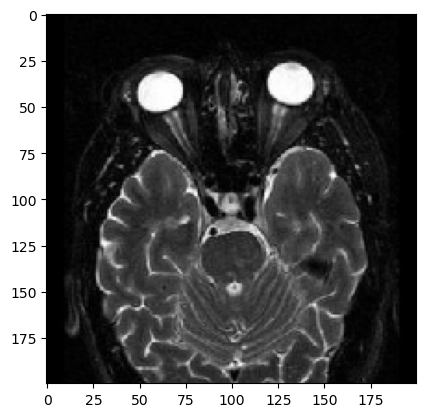

In [34]:
plt.imshow(X[1], cmap='gray')

### Prepare data

In [10]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

### Split Data

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [12]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

### Feature Scaling

In [13]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


### Feature Selection: PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [16]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

### Train Model

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [18]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain, ytrain)
print("Training Score:", knn.score(xtrain, ytrain))
print("Testing Score:", knn.score(xtest, ytest))

Training Score: 0.9314227226202662
Testing Score: 0.9346938775510204


In [19]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
print("Training Score:", lr.score(xtrain, ytrain))
print("Testing Score:", lr.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.7567552410203766


In [20]:
lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9591836734693877


In [21]:
sv = SVC()
sv.fit(xtrain, ytrain)
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9938587512794268
Testing Score: 0.963265306122449


In [22]:
pred_knn = knn.predict(xtest)
pred_lr = lr.predict(xtest)
pred_lg = lg.predict(xtest)
pred_sv = sv.predict(xtest)

In [23]:
misclassified_knn = np.where(ytest != pred_knn)
misclassified_lr = np.where(ytest != pred_lr)
misclassified_lg = np.where(ytest != pred_lg)
misclassified_sv = np.where(ytest != pred_sv)

In [24]:
print("Total Misclassified Samples by K-Nearest Neighbors:", len(misclassified_knn[0]))
print("Total Misclassified Samples by Linear Regression:", len(misclassified_lr[0]))
print("Total Misclassified Samples by Logistic Regression:", len(misclassified_lg[0]))
print("Total Misclassified Samples by SVM:", len(misclassified_sv[0]))


Total Misclassified Samples by K-Nearest Neighbors: 16
Total Misclassified Samples by Linear Regression: 245
Total Misclassified Samples by Logistic Regression: 10
Total Misclassified Samples by SVM: 9


In [25]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

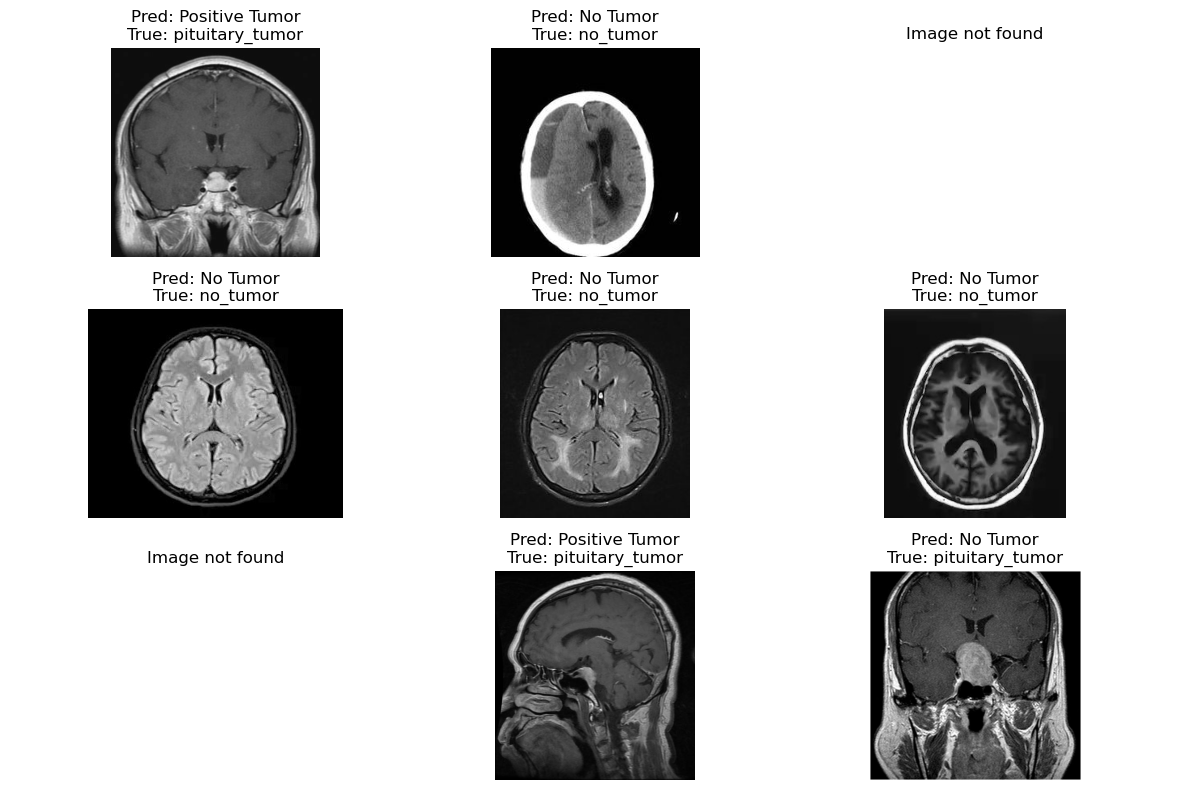

In [26]:
plt.figure(figsize=(12, 8))

# List to store both tumor and no_tumor images
all_images = []

# Add no_tumor images
no_tumor_path = 'BRAIN/Testing/no_tumor/'
for i in os.listdir(no_tumor_path)[:5]:  # Reduced to 5 images
    all_images.append((no_tumor_path + i, 'no_tumor'))

# Add pituitary_tumor images
pituitary_tumor_path = 'BRAIN/Testing/pituitary_tumor/'
for i in os.listdir(pituitary_tumor_path)[:4]:  # Added 4 tumor images
    all_images.append((pituitary_tumor_path + i, 'pituitary_tumor'))

# Shuffle the images to mix tumor and no_tumor
np.random.shuffle(all_images)

for c, (img_path, true_label) in enumerate(all_images, 1):
    plt.subplot(3, 3, c)

    img = cv2.imread(img_path, 0)
    if img is not None:
        img1 = cv2.resize(img, (200, 200))
        img1 = img1.reshape(1, -1) / 255
        p = sv.predict(img1)

        plt.title(f"Pred: {dec[p[0]]}\nTrue: {true_label}")
        plt.imshow(img, cmap='gray')
    else:
        plt.title("Image not found")
    plt.axis('off')

plt.tight_layout()
plt.show()